In [1]:
import scanpy as sc

In [21]:
adata = sc.read_10x_mtx("./content/data/pbmc3k/")
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [22]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [23]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [24]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [25]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [26]:
adata = adata[:, adata.var.highly_variable]

In [27]:
sc.pp.scale(adata, max_value=10)

/Users/vpetukhov/mambaforge/envs/DataAnalysisWorkflows/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [28]:
sc.tl.pca(adata, svd_solver='arpack')

In [29]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [30]:
sc.tl.umap(adata)

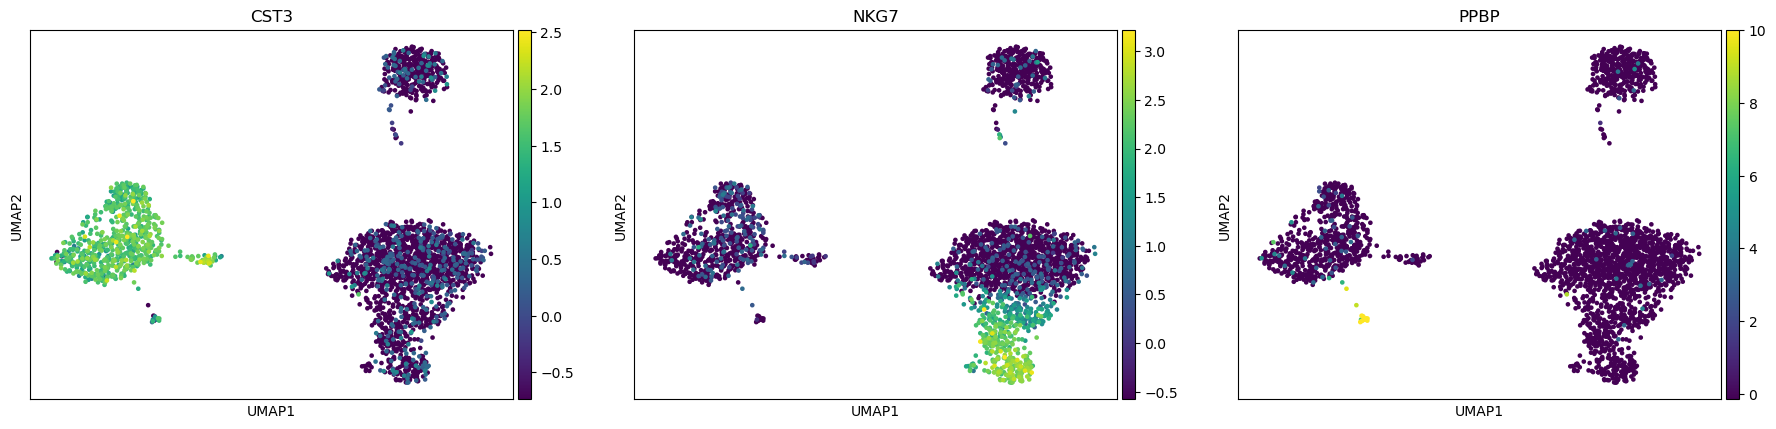

In [31]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [40]:
sc.tl.leiden(adata)

In [43]:
!mkdir -p ./content/data/pbmc3k_processed
adata.raw.to_adata().to_df().to_csv("./content/data/pbmc3k_processed/data.csv")
adata.obs.to_csv("./content/data/pbmc3k_processed/obs.csv")

In [ ]:
!gzip ./content/data/pbmc3k_processed/data.csv